In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import scipy as sp
import scipy.optimize as op
from scipy.interpolate import UnivariateSpline
import copy
import re

# Adding library directory to python search path
import os
import sys
import git
repo = git.Repo('.', search_parent_directories=True)
library_dir = repo.working_tree_dir + '/lib'
sys.path.insert(0, library_dir)

import miptlib as mipt

# Create directory for generated .tex and .pdf
if not os.path.exists('gen'):
    os.mkdir('gen')

## Первичные экпериментальные данные

In [68]:
data = mipt.read_excel('data/5.1.2.xlsx', usecols=('A', 'B', 'C'), header=(0)).dropna()
data


# Ширина по половине высоты. Я у него спрашивал на лабе.
fmt = {
    ('Theta') : [r'$\theta, ^\circ$', '{:.0f}', 0],
    ('N') : [r'$N$, кан.', '{:.0f}', 0],
    ('Width') : [r'$\Delta N$, кан.', '{:.0f}', 0],
}

tab = mipt.table(data, fmt)
tab.to_latex('gen/tab-data.tex')

N( 0) = 845.7393223671427 +- 10.779652875551928
N(90) = 383.6216840544104 +- 3.627598799052881
mc2 = 549.5517456794348 +- 14.686004441880366 кэВ


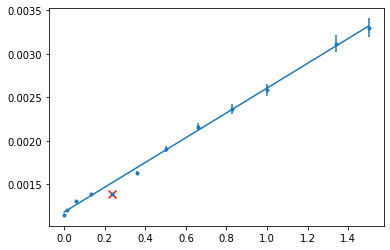

In [69]:
x = 1 - np.cos(data['Theta'] * math.pi / 180)
y = 1 / data['N']

y_err = 10 / data['N'] * y # y #* 0. data['Width'] / data['N']

xc, yc, equ = mipt.plot(x, y, yerr = y_err, exclude=(4,))
mnk = mipt.mnk(xc, yc).data

N_0 = float(1 / mnk['b'])
dN_0 = float(mnk['db'] / mnk['b'] * N_0)

N_90 = 1 / float(mnk['b'] + mnk['a'] * 1)
dN_90 = float(math.sqrt(mnk['db']**2 + mnk['da']**2)) / float(mnk['b'] + mnk['a'] * 1) * N_90 


print("N( 0) = {} +- {}".format(N_0, dN_0))
print("N(90) = {} +- {}".format(N_90, dN_90))

Ey = 662 # кэВ (стр. 27)
mc2 = Ey * N_90 / (N_0 - N_90)


dmc2 = Ey * math.sqrt( dN_90**2 * ( (1/(N_0-dN_90)) + (N_90/(N_0-N_90)**2) )**2 + dN_0**2 * (N_90/(N_0-N_90)**2)**2 )
print("mc2 = {} +- {} кэВ".format(mc2, dmc2))